# Exercise on supervised learning

In this exercise, you will train machine learning methods to predict if a person will survive the Titantic disaster.

The goal is to learn:
*	how to apply different ML classification methods.
*	how to perform cross-validation.
*	how to assess and visualize the performance.
*	how to get an idea on which features are most important.

You will be using the same titantic dataset as you worked with on Monday, but instead of visualizing it and calculating properties you will be training ML methods to predict the chance of survival. You will train different ML methods using different parameters and different features using cross-validation to evaluate performance. For each ML method, you should save your final model, so you can load it and use it for predicting on new data later. Once you have trained and optimized a few ML methods, you will be given a new independent test set to finally check your performance on completely unseen data. We will compare which ML methods performed best, what was the cross-validated performance and what was the test set performance. Hopefully we will choose slightly different methods and training parameters, so we can compare what seems to work best.

We start by reading in the data....


In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data to a pandas DataFrame using the read_csv method.
train=pd.read_csv('titanic_data.csv')

# We are using the train data as placeholder for the test data,
# so we can implement code to run predictions on the test pandas DataFrame
test=pd.read_csv('titanic_data.csv')

#Uncomment this line to read in the true test, it will be revealed in due time....
#test=pd.read_csv('titanic_test.csv')
train


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
5,1,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN,1
6,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",1
7,1,0,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S,NaN,NaN,"Pomeroy, WA",1
8,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.000000,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA",1
9,1,0,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",1


## Data Dictionary

|Variable |	Definition |	Key         |
|----------------------------------------
|survival | Survival   |0 = No, 1 = Yes |
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex	| Sex	|
|age	| Age in years	|
|sibsp	| # of siblings / spouses aboard the Titanic	|
|parch	| # of parents / children aboard the Titanic	|
|ticket	| Ticket number	|
|fare	| Passenger fare	|
|cabin	| Cabin number	|
|embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | number on rescue boat | 
|body | recovered body number |
|home.dest | home destination |
|has_cabin_number | has a cabin | 0 = No, 1 = Yes|


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch: The dataset defines family relations in this way

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Let's add the same columns as we added on Monday, based on data in other columns (It is perfectly fine to copy the code from Monday)

Add some binary information columns:
* Add a 'child' column where those with age < 10 get a 1 and the others 0
* Add a 'female' column for female
* Add a 'male' column for male
* Add a 'adult' column for those with age > 16
* Add a 'adult_male' column for those with age > 16 and male
* Add an 'adult_female' column for those with age > 16 and female

If you want you can also play around with adding other features based on the columns.

While you are at it do the same for the "test" dataframe as well so it has exactly the same columns. It will be easier later when you want to test on that data.  

In [9]:
#EXAMPLE
#This loop over both the train and test dataframes 
for f in [train,test]:
    #This will add a new column with the name 'child' containing all 0
    f['child']=0
#This will change the values of rows that statisfy the train['age']<10 condition
    f['child'].loc[f['age']<10]=1
    f['adult_male']=0
#This will change the values of rows that statisfy the train['age']> 16 and train['sex']=='male' condition, 
#the paranteses around the expression are important.
    f['adult_male'].loc[(f['age']>16) & (f['sex']=='male')]=1
########
#Now try adding the other examples 
    
    
### And maybe some more features
   

train  
#print test[['embarked','embarked_S','embarked_C','embarked_Q']]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number,child,adult_male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,0
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1,0,0
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1,0,1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1,0,1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1,0,0
5,1,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN,1,0,0
6,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",1,0,0
7,1,0,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S,NaN,NaN,"Pomeroy, WA",1,0,1
8,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.000000,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA",1,0,0
9,1,0,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",1,0,1


## Cross-validation sets
Cross-validation is a way to estimate performance by training and testing on subsets of the data. Usually it is common to divide the data into 5 parts (with no similarity between them). If there is no similarity between the data points, the division can be random. But usually there is some connection between data points. In the case of training on sequence data, sequence similarity is commonly used to group data points. Here, we will be using the number on the `ticket` to split up the set to avoid training on data from one family member and then test on data from the same family. If you want you can try otherways of dividing the set, or even do it randomly.

To split on the ticket number, we will be creating a dictionary with the ticket number as key and cross-validation set number [1,2,3,4 or 5] as value, and adding a new `cv` column to the `train` pandas DataFrame.

The following code block will iterate over all rows and store the cv set number in the dictionary `ticket_number_cv`. 
Modify the code to so it also adds a `train['cv']` column with the cv set number of the corresponding row. 

In [10]:
#make cross_val sets by grouping ticket number
ticket_number_cv={}
cv=1
train['cv']=None
cv_count={}
for i,row in train.iterrows():
    if cv not in cv_count:
        cv_count[cv]=0
    if row['ticket'] not in ticket_number_cv:
            ticket_number_cv[row['ticket']]=cv
            cv=cv+1
            if cv>5:
                cv=1
    train.loc[i,'cv']=ticket_number_cv[row['ticket']]
    cv_count[ticket_number_cv[row['ticket']]]=cv_count[ticket_number_cv[row['ticket']]]+1

print(train.shape)
print(cv_count)

(1040, 18)
{1: 201, 2: 204, 3: 205, 4: 211, 5: 219}


## Scaling
For some machine learning methods, e.g. SVM, scaling the features between 0-1 can improve the convergence and performance. Use the same `preprocessing.MinMaxScalar()` from `sklearn` as we used on Monday. If you want you can choose to compare the performance of scaling vs. no scaling. 

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


#Pick the columns that have numbers that can be used for training:
trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
trainable_cols=["age","fare","male"]

#For the training we include the 'cv' column
train_columns=trainable_cols + ["survived","cv"]
test_columns=trainable_cols + ["survived"]

#Make train_data and test_data to be used for training and testing.
train_data=train[train_columns].dropna()
test_data=test[test_columns].dropna()
#df=train_target[trainable_cols]
  
scaling=False
if scaling:
    columns_to_scale=trainable_cols 
    # Fit the scaler on the training data
    min_max_scaler.fit(train_data[columns_to_scale].values)
    # Transform the scaling to the train_data
    train_data.loc[:,columns_to_scale]=min_max_scaler.transform(train_data[columns_to_scale].values)
    # Transform the scaling to the test_data
    test_data.loc[:,columns_to_scale]=min_max_scaler.transform(test_data[columns_to_scale].values)

train_data

KeyError: "['male'] not in index"

## Setting up the data for training.
Set up the data by making a numpy matrix of the training data called `X`, numpy vector with the target values `Y`, and if you are using cross-validitation use the PreDefinedSplit class (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html) to


In [7]:
from sklearn.model_selection import PredefinedSplit
(size_x,size_y)=train_data.shape
target_index=size_y-2
cv_index=size_y-1


#Put the training data in X the .values method returns a numpy matrix of the numbers in the DataFrame.
X=train_data[trainable_cols].values #,0:target_index]
#print X

#Put the target value in Y
Y=train_data['survived'].values

#Use the PredefinedSplit class to define the cross-validation sets from before.
cv = PredefinedSplit(train_data['cv'].values)




## Training Machine Learning Methods
Finally we can train machine learning methods... 

In [7]:
import sklearn
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=None)

#Some dictionaries to store cross-validated predictions


pred_save=[]
true_save=[]
pred_prob_save=[]



for i, (train_index, val_index) in enumerate(cv.split(),1):
    print("Set: ",i)
    print("Training on",len(train_index),"examples")
    print("Testing on",len(val_index),"examples")
    (X_train, X_val) = X[train_index,:], X[val_index,:]
    (Y_train, Y_val) = Y[train_index], Y[val_index]
    #print X_train.shape
    #print Y_train.shape
    #train_pred=clf.predict(X_train)
    #acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
    #print acc_train
    clf=clf.fit(X_train,Y_train)
         #   continue

    #Predict on the training data    
    pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
    acc_train=accuracy_score(pred,Y_train)
    mcc_train=matthews_corrcoef(pred,Y_train)
    f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
    val_pred=clf.predict(X_val)
   # print val_pred
    #Predict the probability (to use the roc-plot later)
    val_pred_prob=val_pred
    
    #val_pred_prob=clf.predict_proba(X_val)
    
    #Save the values to have predictions for all folds.
    pred_save.append(val_pred)
    pred_prob_save.append(val_pred_prob)
    true_save.append(Y_val)
    #Calculate performance measures on the validation data
    acc=accuracy_score(val_pred,Y_val)
    mcc=matthews_corrcoef(val_pred,Y_val)
    f1=f1_score(val_pred,Y_val)
    
    print("Training performance","f1",f1_train,"acc",acc_train,"mcc",mcc_train)
    print("Validation performance","f1",f1,"acc",acc,"mcc",mcc)
    print("==============")


       

    
#Calculate overall validation performance
predictions=np.concatenate(pred_save)
correct=np.concatenate(true_save)
predicted_prob=np.concatenate(pred_prob_save)
acc=accuracy_score(predictions,correct)
mcc=matthews_corrcoef(predictions,correct)
f1=f1_score(predictions,correct)
print("==============")
print("Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc)
print("==============")



AttributeError: 'int' object has no attribute 'split'

In [11]:
#Some code to visualize decision trees. Assume there is train decision tree namned 'clf'
#!conda install -y python-graphviz
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(clf, out_file=None,feature_names=trainable_cols,filled=True,class_names=['Survived','Died']) 
#graph = graphviz.Source(dot_data) 
#graph.render("titanic") 

Then we might want to loop over different features and check performance....

In [9]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm

#Define a classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, n_jobs=4,random_state=None,verbose=0)

 
#Use the cv.split() method to generate an iterator of the cross-validation sets.


#Some dictionaries to store cross-validated predictions
predictions={}
correct={}
predicted_prob={}

pred_save=[]
true_save=[]
pred_prob_save=[]
legend_text=[]

#trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
#trainable_cols=["pclass","male"]

for feat_stop in range(0,X.shape[1]+1):
    name="-".join(trainable_cols[0:feat_stop+1])
    #name
    legend_text.append(name) #trainable_cols[feat_stop-1]) #len(feat_name))
    pred_save=[]
    true_save=[]
    pred_prob_save=[]
    for i, (train_index, val_index) in enumerate(cv.split(),1):
        #print "Set: ",i, name
        #print "Training on",len(train_index),"examples" 
        #print "Testing on",len(val_index),"examples"
        (X_train, X_val) = X[train_index,0:feat_stop+1], X[val_index,0:feat_stop+1]
        (Y_train, Y_val) = Y[train_index], Y[val_index]
    #print X_train.shape
    #print Y_train.shape
    #train_pred=clf.predict(X_train)
    #acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
    #print acc_train
        clf=clf.fit(X_train,Y_train)
         #   continue

    #Predict on the training data    
        pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
        acc_train=accuracy_score(pred,Y_train)
        mcc_train=matthews_corrcoef(pred,Y_train)
        f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
        val_pred=clf.predict(X_val)
    #Predict the probability (to use the roc-plot later)
        val_pred_prob=clf.predict_proba(X_val)
    #Save the values to have predictions for all folds.
        pred_save.append(val_pred)
        pred_prob_save.append(val_pred_prob)
        true_save.append(Y_val)
    #Calculate performance measures on the validation data
        acc=accuracy_score(val_pred,Y_val)
        mcc=matthews_corrcoef(val_pred,Y_val)
        f1=f1_score(val_pred,Y_val)
    
        #print "Training performance","f1",f1_train,"acc",acc_train,"mcc",mcc_train
        #print "Validation performance","f1",f1,"acc",acc,"mcc",mcc

       
    
    
#Calculate overall validation performance
    predictions[name]=np.concatenate(pred_save)
    correct[name]=np.concatenate(true_save)
    predicted_prob[name]=np.concatenate(pred_prob_save)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    print "=============="
    print "Training on", name
    print "Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc
    print "=============="

Training on age
Overall Validation Performance f1 0.403007518797 acc 0.617901828681 mcc 0.151100128186
Training on age-fare
Overall Validation Performance f1 0.517791411043 acc 0.621751684312 mcc 0.206628707356
Training on age-fare-male
Overall Validation Performance f1 0.687268232386 acc 0.756496631376 mcc 0.487972070415
Training on age-fare-male
Overall Validation Performance f1 0.6875 acc 0.759384023099 mcc 0.492269274371


[('age', array([0, 1, 0, ..., 0, 0, 0])), ('age-fare', array([0, 0, 0, ..., 1, 0, 0])), ('age-fare-male', array([1, 1, 0, ..., 1, 0, 0]))]


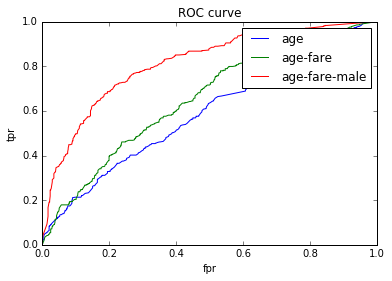

In [10]:
plt.clf()

legend_text=[]
pred_sorted=sorted(predictions.items(), key=lambda kv: (len(kv[1]), kv[0]))
print pred_sorted


for (name,value) in pred_sorted:
    #print key, value
    #continue
    legend_text.append(name)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    #(prec,recall,thres)=precision_recall_curve(true_save,pred_prob_save[:,1])
    (fpr,tpr,thres_roc)=roc_curve(correct[name],predicted_prob[name][:,1])
    plt.plot(fpr,tpr)
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
      
    plt.savefig('RF.png',dpi=300)
plt.legend(legend_text)  
plt.show()


In [11]:
print(clf.feature_importances_)


[ 0.30703592  0.4444016   0.24856247]


In [12]:
#from sklearn.metrics import matthews_corrcoef
trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","passenger_on_ticket","kids_on_ticket","teens_on_ticket","adults_on_ticket","child"]
#trainable_cols.reverse()
trainable_cols.append("survived")
trainable_cols.append("cv")
#train[trainable_cols].dropna().to_csv('titanic_data.csv')
#print trainable_cols
#trainable_cols=["age","fare","pclass","survived","cv"]
#tmp=train[["cv","survived"]]
#corr=np.corrcoef(tmp)
#df_clean=train[trainable_cols].dropna()
#df_clean["survived"].unique
#df_clean.to_excel('tmp.xls')
#g = sns.factorplot("cv", "survived", "male", data=df_clean, kind="bar", palette="muted", legend=True)
#plt.show()

print(trainable_cols)


data=train[trainable_cols].dropna().values.astype(float)
print(data.shape[1])
(size_x,size_y)=data.shape
X=data[:,0:size_y-2]
Y=data[:,size_y-2]
CV_splits=data[:,size_y-1]
print(X)
#print data.shape
corr=np.corrcoef(data)
#corr=np.corrcoef(data, rowvar=False)
#print corr.shape

#print sklearn.metrics
#np.set_printoptions(precision=3)
#print(corr)
for i,name in enumerate(trainable_cols):
#    c=matthews_corrcoef(data[:,i],data[:,size_y-1])
    print(i,name,corr[i,size_y-1])
    

['age', 'fare', 'pclass', 'has_cabin_number', 'male', 'female', 'sibsp', 'parch', 'passenger_on_ticket', 'kids_on_ticket', 'teens_on_ticket', 'adults_on_ticket', 'child', 'survived', 'cv']
15
[[  29.          211.3375        1.         ...,    0.            4.            0.        ]
 [  53.           51.4792        1.         ...,    0.            2.            0.        ]
 [  80.           30.            1.         ...,    0.            1.            0.        ]
 ..., 
 [  27.            8.6625        3.         ...,    0.            1.            0.        ]
 [  29.88113451    7.225         3.         ...,    0.            1.            0.        ]
 [  29.88113451   14.4583        3.         ...,    0.            2.            0.        ]]
(0, 'age', 0.99858189314046575)
(1, 'fare', 0.79489663874598371)
(2, 'pclass', 0.45793740340675754)
(3, 'has_cabin_number', 0.90035230496467433)
(4, 'male', 0.83847787103332772)
(5, 'female', 0.99733687267296756)
(6, 'sibsp', 0.52320200245513215)
(

# YOU HAVE FORGOTTEN TO INITIALIZE "MEASURES" VARIABLE

In [16]:
plt.clf()
legend_text=[]
for feat_stop in range(X.shape[1],X.shape[1]+1):
    feat_name="-".join(trainable_cols[0:feat_stop+1])
    legend_text.append(trainable_cols[feat_stop-1]) #len(feat_name))
    for trees in (100,): #(1,10,100,1000):
        clf = RandomForestClassifier(n_estimators=trees, max_depth=None, min_samples_split=2, n_jobs=4,random_state=None,verbose=0)
        fold=1
        pred_save=[]
        true_save=[]
        pred_prob_save=[]
        for train_index, test_index in cv.split():
            print(trees,fold,len(train_index),len(test_index))
            #continue
            print(feat_name,feat_stop)


            X_train, X_test = X[train_index,0:feat_stop+1], X[test_index,0:feat_stop+1]
            Y_train, Y_test = Y[train_index], Y[test_index]
           # continue
            #print feat_name,feat_stop,X_test.shape
           # continue
            clf=clf.fit(X_train,Y_train)
         #   continue
            train_pred=clf.predict(X_train)
            test_pred=clf.predict(X_test)
            test_pred_prob=clf.predict_proba(X_test)
            acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
            MC_train=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
            acc=sklearn.metrics.accuracy_score(train_pred,Y_train)
            MC=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
        
            
            name=feat_name +'-trees-'+str(trees)+'-fold-'+str(fold)
            
            measures['MC_train'][name]=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
            measures['MC_test'][name]=sklearn.metrics.matthews_corrcoef(test_pred,Y_test)
            measures['acc_train'][name]=sklearn.metrics.accuracy_score(train_pred,Y_train)
            measures['acc_test'][name]=sklearn.metrics.accuracy_score(test_pred,Y_test)
            measures['F1_train'][name]=sklearn.metrics.f1_score(train_pred,Y_train)
            measures['F1_test'][name]=sklearn.metrics.f1_score(test_pred,Y_test)
            pred_save.append(test_pred)
            pred_prob_save.append(test_pred_prob)
            true_save.append(Y_test)
            fold=fold+1
        #continue
        name=feat_name +'-trees-'+str(trees)+'-overall'
    #print Y_test
    #print np.concatenate(true_save)
        pred_save=np.concatenate(pred_save)
        true_save=np.concatenate(true_save)
        pred_prob_save=np.concatenate(pred_prob_save)
        measures['MC_test'][name]=sklearn.metrics.matthews_corrcoef(pred_save,true_save)
        measures['acc_test'][name]=sklearn.metrics.accuracy_score(pred_save,true_save)
        measures['F1_test'][name]=sklearn.metrics.f1_score(pred_save,true_save)
        (prec,recall,thres)=sklearn.metrics.precision_recall_curve(true_save,pred_prob_save[:,1])
        (fpr,tpr,thres_roc)=sklearn.metrics.roc_curve(true_save,pred_prob_save[:,1])
        plt.plot(fpr,tpr)
        plt.title('ROC curve')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        #plt.xlabel('Prec')
        #plt.ylabel('Recall')
    

(100, 1, 838, 201)
('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-passenger_on_ticket-kids_on_ticket-teens_on_ticket-adults_on_ticket-child-survived', 13)


KeyError: 'MC_train'

In [137]:
train[train['home.dest'].str.match('Sweden').fillna(False)]

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
474,475,2,0,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,NaN,165.0,"Sweden / Arlington, NJ",0
610,611,3,0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,NaN,NaN,"Sweden Akeley, MN",0
622,623,3,0,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
623,624,3,0,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
624,625,3,0,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
627,628,3,0,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
628,629,3,0,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
629,630,3,0,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
632,633,3,0,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
633,634,3,0,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN,NaN,"Sweden Chicago, IL",0
